In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
%matplotlib inline
sns.set()

In [2]:
boston = load_boston()
data=pd.DataFrame(boston.data, columns=boston.feature_names)
target=pd.DataFrame(boston.target)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [50]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


CRIM - Уровень преступности на душу населения в разбивке по городам
ZN - ZN доля жилой земли, зонированной для участков площадью более 25 000 кв.футов.
INDUS - Доля промышленных площадей, не связанных с розничной торговлей, в гектарах на город
CHAS - Фиктивная переменная реки Чарльз (= 1, если тракт ограничивает реку; 0 в противном случае)
NOX  - Концентрация оксидов азота NOX (частей на 10 миллионов)
RM - Среднее количество комнат в RM на одно жилое помещение
AGE - ВОЗРАСТНАЯ доля квартир, занимаемых владельцами, построенных до 1940 года
DIS - Взвешенные расстояния до пяти бостонских центров занятости
RAD - Индекс доступности радиальных магистралей RAD
TAX - НАЛОГ на имущество с полной стоимостью - ставка налога за 10 000 долларов США
PTRATIO - Соотношение учащихся и учителей по городам
B - B 1000(Bk - 0,63)^2, где Bk - доля чернокожих по городам
LSTAT - LSTAT% более низкий статус населения
target - Медианная стоимость домов, занимаемых владельцами, в 1000 долларов США

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

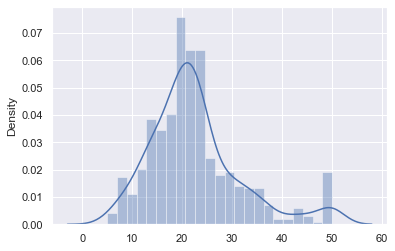

In [4]:
sns.distplot(target)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RM', ylabel='Density'>

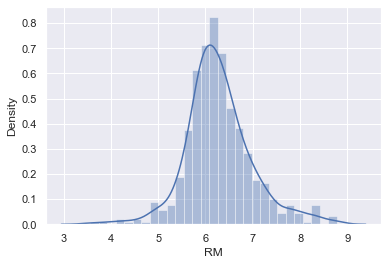

In [10]:
sns.distplot(data.RM)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

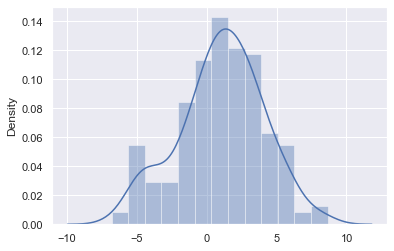

In [28]:
import scipy.stats as sps
sample_norm = sps.norm(loc=1, scale=3).rvs(size=200)
sns.distplot(sample_norm)

# Тесты на нормальность распределения

In [29]:
# Тест Шапиро-Вилка
# Проверяет, имеет ли выборка данных распределение Гаусса
# Предположения: Наблюдения в каждой выборке независимы и одинаково распределены (iid)
# интерпретация:
# H0: образец имеет гауссово распределение
# H1: образец не имеет гауссовского распределения
from scipy.stats import shapiro
stat, p = shapiro(sample_norm)
print(stat, p)
stat, p = shapiro(data.RM)
print(stat,p)

0.9879556894302368 0.08877000212669373
0.9608713984489441 2.41115960530891e-10


p-value в первом случае > 0,05, т.е. Н0 неопорверается, распределение нормальное
p-value во втором случае < 0,05, т.е. Н0 опровергается, рспределение data.RM не является нормальным

In [30]:
# Тест д'Агостино на K ^ 2
# Проверяет, имеет ли выборка данных распределение Гаусса
# Предположения: Наблюдения в каждой выборке независимы и одинаково распределены (iid)
# интерпретация:
# H0: образец имеет гауссово распределение
# H1: образец не имеет гауссовского распределения
from scipy.stats import normaltest
stat, p = normaltest(sample_norm)
print(stat, p)
stat, p = normaltest(data.RM)
print(stat,p)

2.002922718346534 0.3673422298004172
37.89574305099423 5.90260814347777e-09


p-value в первом случае > 0,05, т.е. Н0 неопорверается, распределение нормальное
p-value во втором случае < 0,05, т.е. Н0 опровергается, рспределение data.RM не является нормальным

In [38]:
# Тест Андерсона-Дарлинга
# Проверяет, имеет ли выборка данных распределение Гаусса
# Предположения: Наблюдения в каждой выборке независимы и одинаково распределены (iid)
# интерпретация:
# H0: образец имеет гауссово распределение
# H1: образец не имеет гауссовского распределения
from scipy.stats import anderson
print(anderson(sample_norm))

print(anderson(data.RM))


AndersonResult(statistic=0.7591582882444072, critical_values=array([0.565, 0.644, 0.772, 0.901, 1.071]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=6.117722051337296, critical_values=array([0.572, 0.651, 0.781, 0.911, 1.084]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


# Корреляционные тесты

Коэффициент корреляции Пирсона
Проверяет, имеют ли два образца линейную зависимость.
Наблюдения в каждой выборке независимы и одинаково распределены (iid).
Наблюдения в каждой выборке обычно распределяются.
Наблюдения в каждом образце имеют одинаковую дисперсию.
интерпретация:
    H0: два образца независимы.
    H1: существует зависимость между образцами.

In [46]:
from scipy.stats import pearsonr
corr, p = pearsonr(data.RM, data.CRIM)
print(corr,p)

-0.21924670286251396 6.346702984686082e-07


Ранговая корреляция Спирмена
Проверяет, имеют ли два образца монотонные отношения.
Наблюдения в каждой выборке независимы и одинаково распределены (iid).
Наблюдения в каждом образце могут быть ранжированы.
интерпретация

    H0: два образца независимы
    H1: существует зависимость между образцами.

In [48]:
from scipy.stats import spearmanr
corr, p = spearmanr(data.RM, target)
print(corr, p)

0.6335764254337745 3.822976266954402e-58


Ранговая корреляция Кендалла
Проверяет, имеют ли два образца монотонные отношения.   
Наблюдения в каждой выборке независимы и одинаково распределены (iid).
Наблюдения в каждом образце могут быть ранжированы.
интерпретация

    H0: два образца независимы.
    H1: существует зависимость между образцами.

In [49]:
from scipy.stats import kendalltau
corr, p = kendalltau(data.RM, target)
print(corr, p)

0.4828293459713593 5.749656994831648e-59


Тест хи-квадрат
Проверяет, являются ли две категориальные переменные связанными или независимыми.
Наблюдения, использованные при расчете таблицы сопряженности, являются независимыми.
25 или более примеров в каждой ячейке таблицы сопряженности.
интерпретация

    H0: два образца независимы.
    H1: существует зависимость между образцами.

In [52]:
from scipy.stats import chi2_contingency 

info = [[100, 200, 300], [50, 60, 70]] 
print(info)
stat, p, dof, ex= chi2_contingency(info) 

print(dof)

significance_level = 0.05
print("p value: " + str(p)) 
if p <= significance_level: 
	print('Отвергаем NULL HYPOTHESIS') 
else: 
	print('Принимаем NULL HYPOTHESIS') 

[[100, 200, 300], [50, 60, 70]]
2
p value: 0.001937714203415323
Reject NULL HYPOTHESIS


# Параметрические статистические проверки гипотез

Студенческий т-тест
Проверяет, значительно ли отличаются два независимых образца. Cтатистическиq тест гипотезы для проверки того, были ли получены две выборки из одной популяции.
Наблюдения в каждой выборке независимы и одинаково распределены (iid).
Наблюдения в каждой выборке обычно распределяются.
Наблюдения в каждом образце имеют одинаковую дисперсию.
интерпретация

    H0: средства образцов равны.
    H1: средства образцов неравны.

In [57]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(data.RM, data.CRIM)
print(stat,p)
stat, p = ttest_ind(data.RM, data.RM)
print(stat,p)

6.962201789230189 6.024192825435379e-12
0.0 1.0


Впервом случае гипотеза Н0 отвергвется, р<0,05
Во втором случает гипотеза Н0 подтверждается, p>0,05

Парный студенческий т-тест
Проверяет, значительно ли отличаются два парных образца. Парный t-критерий Стьюдента для количественной оценки разницы между средним двух зависимых выборок данных.
Наблюдения в каждой выборке обычно распределяются.
Наблюдения в каждом образце имеют одинаковую дисперсию.
Наблюдения по каждому образцу являются парными.
интерпретация

    H0: средства образцов равны.
    H1: средства образцов неравны.

In [63]:
from scipy.stats import ttest_rel
stat, p = ttest_rel(data.RM, data.CRIM)
print(stat,p)
stat, p = ttest_rel(data.RM, data.TAX)
print(stat,p)

6.841551282272938 2.2743638008008605e-11
-53.58245034920694 1.7458397598071636e-210


Нулевая гипотеза отклоняется, т.к. р<0,05

Анализ дисперсионного теста (ANOVA)
Проверяет, значительно ли отличаются два или более независимых образца, это статистический тест, который предполагает, что среднее значение для 2 или более групп одинаково
Наблюдения в каждой выборке независимы и одинаково распределены (iid).
Наблюдения в каждой выборке обычно распределяются.
Наблюдения в каждом образце имеют одинаковую дисперсию.
интерпретация

    H0: средства образцов равны.
    H1: одно или несколько средств отсчетов неравны.

In [67]:
from scipy.stats import f_oneway
stat, p = f_oneway(data.TAX, data.RM, target.iloc[:,0])
print(stat, p)

2758.218794529565 0.0


# Непараметрические статистические проверки гипотез
## это те методы, которые не предполагают конкретного распределения данных
### разработаны для использования с порядковыми или интервальными данными

U-тест Манна-Уитни
Проверяет, равны ли распределения двух независимых выборок или нет, были ли взяты две независимые выборки из популяции с одинаковым распределением. Два образца объединяются и ранжируются вместе. Стратегия состоит в том, чтобы определить, являются ли значения из двух выборок случайно смешанными в порядке ранжирования или они объединены в противоположные концы при объединении. Случайный порядок ранга будет означать, что две выборки не отличаются, в то время как кластер значений одной выборки будет указывать на разницу между ними.
Наблюдения в каждой выборке независимы и одинаково распределены (iid).
Наблюдения в каждом образце могут быть ранжированы.
интерпретация

    H0: распределения обоих образцов равны.
    H1: распределения обоих образцов не равны.

In [68]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
# seed the random number generator
seed(1)
# generate two independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51
# compare samples
stat, p = mannwhitneyu(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=4025.000, p=0.009
Different distribution (reject H0)


Тест Уилкоксона со знаком является непараметрической статистической процедурой для сравнения двух выборок, которые являются парными или связанными
Проверяет, равны ли распределения двух парных выборок или нет.
Наблюдения в каждой выборке независимы и одинаково распределены (iid).
Наблюдения в каждом образце могут быть ранжированы.
Наблюдения по каждому образцу являются парными.
интерпретация

H0: распределения обоих образцов равны.
H1: распределения обоих образцов не равны.

In [69]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import wilcoxon
# seed the random number generator
seed(1)
# generate two independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51
# compare samples
stat, p = wilcoxon(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=1886.000, p=0.028
Different distribution (reject H0)
